### Problema de negocio

ALL in ONE PLANE - empresa que comercializa produtos de segunda linha de varias marcas um preço menor, atraves de um e-commerce.

1 ano de operação o time de marketing percebeu que alguns clientes da sua base, compram produtos mais caros, com alta frequancia e acabam contribuindo com uma parcela grande no faturamento da empresa.

baseado nessa analise, o marketing deseja criar um programa de fidelidade para os melhores clientes, chamado INSIDER, mas o time não tem conhecimento avançado em analise de dados para eleger os participantes.

por esse motivo, o time de marketing requisitou ao time de dados uma seleção de clientes elegiveis ao programa, usando tecnicas avançadas de manipulação de dados.

_____________________________________________________

### O desafio

O time de ciencia de dados da ALL in ONE PLACE, que precisa determinar quem são os clientes elegíveis para participar de INSIDERS.

Como o resultado para esse projeto, é esperado que você entregue uma lista de pessoas elegiveis a participar do programa INSIDERS, junto com um relatorio respondendo as seguintes perguntas:

1. Quem são as pessoas elegiveis para participar do programa de INSIDERS

2. Quantos clientes farão parte do grupo

3. quais as principais caracteristicas desses clientes

4. Qual a porcentagem da contribuição do faturamento, vinda dos INSIDERS

5. Qual a expectativa de faturamento desse grupo para os proximos meses

6. Quais as condições para uma pessoa ser elegivel ao INSIDERS

7. Quais as condições para uma pessoa ser removida dos INSIDERS

8. Qual a garantia que o programa INSIDERS é melhor que o restante da base

9. Quais ações o time de marketing pode realizar para aumentar o faturamento

__________________________________________________

### Planejamento da Solução (IOT) 

Intput(entrada)

    1. Problema de negocio (Selecionar clientes para fidelização)

    2. Conjunto de dados (Vendas de um e-commerce durante 1 ano)

Output(saida)

    1. Indicação das pessoas que farão parte do programa 'Insiders'
        - Lista: cliente_id | is_insiders

    2. Relatorio com as perguntas de negocio acima

__________________________________________________

### Dados

Cada linha representa uma transação de venda, que ocorreu entre o periodo de Nov 2016 e Dez 2017

o conjunto de dados inclui as seguintes informações:

- *invoice number* -> identificador unico de cada transação
- *stock code product* -> codigo do item
- *description product* -> nome do item
- *quantity* -> a quantidade de cada item comprado por transação
- *invoice date* -> o dia em que a transasção ocoreu
- *unit price* -> preco do produto por unidade
- *customer id* -> identificador unico do cliente
- *country* -> o nome do pais que o cliente reside

__________________________________________________

### Tasks

1. Quem são as pessoas elegiveis para participar do programa de INSIDERS
    - O que é ser elegível? O que são clientes de maior 'valor'?
    - faturamento: 

        - Alto ticket médio (compras)
        - Alto LTV (total de compras)
        - Baixo Recência (tempo de ultima compra)
        - Alto basket size (cestinha)
        - Baixa probabilidade de churn (saída de cliente)
        - Alta Previsão de LTV
        - Alta propensão de compra

    - Custo

        - Baixa taxa de devolução
    

    - Experiencia de compra
    
        - Media alta das avaliações
        

2. Quantos clientes farão parte do grupo
    - Numero total de clientes

    - % do grupo insiders


3. quais as principais caracteristicas desses clientes
    - Escrever caracteristicas do cliente:
        - Idade
        - Localização

    - Escrever caracteristicas do consumo
        - Atributos de clusterização

4. Qual a porcentagem da contribuição do faturamento, vinda dos INSIDERS
    - Faturamento total do ano
    - Faturamento do grupo insiders

5. Qual a expectativa de faturamento desse grupo para os proximos meses
    - LTV do grupo insiders
    - Analise de cohort

6. Quais as condições para uma pessoa ser elegivel ao INSIDERS
    - Definir periodicidade (1 mes, 3 meses)
    - A pessoa precisa ser similar ou parecido com uma pessoa do grupo

7. Quais as condições para uma pessoa ser removida dos INSIDERS
    - Definir periodicidade (1 mes, 3 meses)
    - A pessoa precisa ser desimilar ou não parecida com uma pessoa do grupo

8. Qual a garantia que o programa INSIDERS é melhor que o restante da base
    - Testes A/B
    - Teste A/B bayesiano
    - Teste de hipótese

9. Quais ações o time de marketing pode realizar para aumentar o faturamento
    - Desconto
    - Preferencia de compra
    - Frete

___________________________________________________________________

## Benchmark de soluções

### Desk Research

#### - RFM

#### 1. Recencia
    - Tempo desde a ultima compra
    - Responsividade (sempre comprando)

#### 2. Frequencia
    - Quantidade de compra em um determinado periodo de tempo
    - Engajamento (interações)

#### 3. Monetario
    - Total gasto(faturamento)
    - Alto valor de compra

### Passo a Passo:

1. Passo 1
    - ordenar os clientes por recencia

2. Passo 2
    - Dividir a base de clientes de acordo com as notas
        - notas de 1-5 (5notas)
        - 5 grupos de 20% da base

3. passo 3
    - Ordenar os clientes por Frequencia

4. passo 4
    - Dar as notas

5. passo 5
    - Ordenar os clientes pelo monetario

6. passo 6
    - Dar as notas

7. passo 7
    - Calcular a média das NOTAS para o R, F, M

### Segmentação dos Clientes

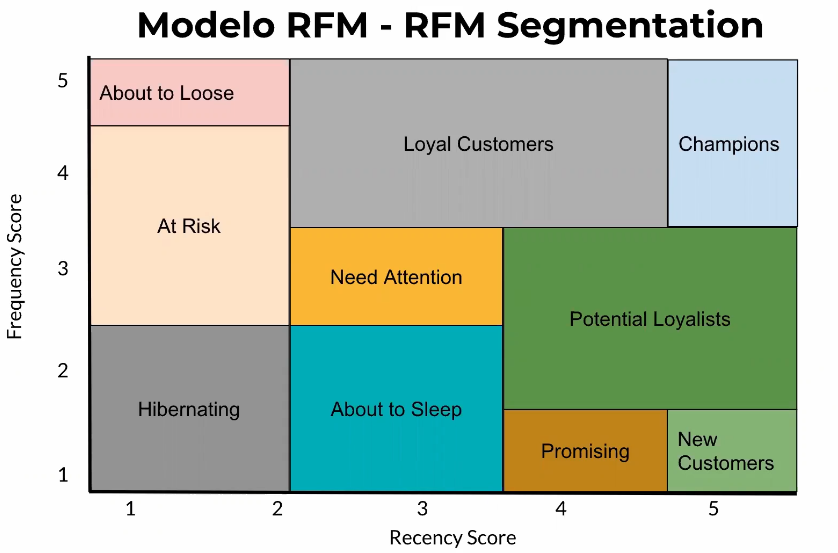

- Champions
    - compras recentes, frequantes com alto valor gasto.
    - Premios para esses clientes

- Potencial Loyalist
    - Compras recentes, boa frequencia e bom valor gasto
    - Programa de fidelização e Upsell

- New Customers
    - Compra recente, baixa frequencia
    - Construção de relacionamento, ofertas especiais.

- At Risk Customers
    - 'Faz tempo que não compra'
    - Campanhas de reativação, ofertas, produtos

- Can´t Lose Them
    - Faz temnpo que não compra e nem visita



## Imports

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt


#visualizar todo o dataset
pd.set_option('display.max_columns', None)  # Define para mostrar todas as colunas
pd.set_option('display.expand_frame_repr', False)  # Evita quebras de linha nas colunas

### Load Dataset

In [25]:
df_raw = pd.read_csv('Ecommerce.csv', sep=',', encoding='unicode_escape')

#dropando coluna extra
df_raw.drop(columns='Unnamed: 8', inplace=True)

In [26]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## Descrição dos Dados

In [40]:
df1 = df_raw.copy()

### Rename columns

In [41]:
palavras_corrigidas = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']

df1.columns = palavras_corrigidas

### Data dimensions

In [45]:
print(f'Numbers of rows: {df1.shape[1]}')
print(f'Numbers of cols: {df1.shape[0]}')

Numbers of rows: 8
Numbers of cols: 541909


### Data types

In [46]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [48]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


### Check NaN

In [49]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

### Replace Nan

In [55]:
#remove NaN
df1 = df1.dropna(subset=['description', 'customer_id'])
print('Remove data: {:.2f}%'.format(1 - (df1.shape[0] / df_raw.shape[0]))) #retornando o valor removido em porcentagem da base de dados

Remove data: 0.25%


### Check types

In [57]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [59]:
#invoice date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y') #format(dia-abrv_mes-ano)

#costumer id
df1['customer_id'] = df1['customer_id'].astype(int)

### Descriptive statistcs

## Feature Engineering

In [95]:
df2 = df1.copy()

### Feature Creation

In [96]:
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [97]:
#data reference
# retorna os clientes unicos da base, sem duplicar
df_ref = df2.drop([ 'invoice_no', 'stock_code', 'description',
                    'quantity', 'invoice_date', 'unit_price',
                    'country'], axis=1).drop_duplicates(ignore_index=True)

df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [98]:
#Gross Revenue (Faturamento) quantidade * preco = Faturamento
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

#Monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()              #criando novo df para ser mesclado pelo customer_id

df_ref = pd.merge(df_ref, df_monetary, on = 'customer_id', how='left')                                      # merge para ordenar de acordo com o index, pois no df_monetary ele foi resetado

#Recency (data da ultima compra)
df_recency = df2[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()                # agrupando e pegando o max = valor de compra mais recente na base
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days               # pegando o numero de dias de (uma dt - outra dt)
df_recency = df_recency[['customer_id', 'recency_days']].copy()                                             # salvando no df apenas id e dias da ultima compra

df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')                                         # merge de ordenação

#Frequency (quantas compras dentro do periodo de 1 ano)
df_freq = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index() # dropando para retornar o identificador unico de cada compra

df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')                                            # merge de ordenação

## Filtragem da variaveis

In [100]:
df3 = df2.copy()

## EDA (Explore Data Analysis)

In [ ]:
df4 = df3.copy()

## Data Preparation

In [ ]:
df5 = df4.copy()

## Feature Selection

In [ ]:
df6 = df5.copy()

## Hiperparameter Fine-Tunning

In [ ]:
#!!!!!!!!!!!!!

## Model Training

## Cluster Analysis

## Deploy to Production